# Chapter 3.2: LA County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

Using LA backup file.


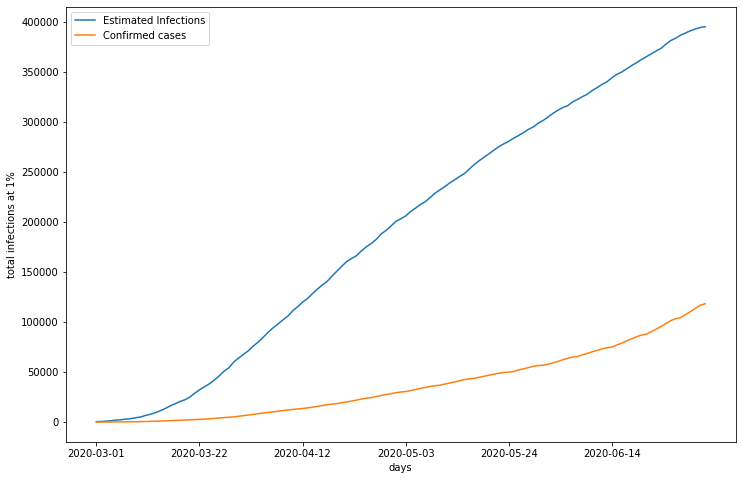

In [2]:
try:
    df = pd.read_csv('https://lacdph.shinyapps.io/covid19_surveillance_dashboard/_w_f37c9304/session/10ab1e924bbee098b7a65bee8613174d/download/download3?w=f37c9304')
    df.to_csv('LA_Backup.csv', index = False)
except:
    df = pd.read_csv('LA_Backup.csv', index_col = False )
    print("Using LA backup file.")

index_val = len(df.index) 

df = df.sort_index(ascending=False, axis=0)
df = df.reset_index()

for ind in df.index:
    if (int(ind)+18) > index_val-1:
        df.loc[ind, 'total_infections'] = 0
    else:
        df.loc[ind, 'total_infections'] = df.loc[ind+18, 'total_deaths'] * 100

df = df[0:-18]

plt.figure(figsize=(12,8))
plt.plot(df['date_use'], df['total_infections'], label='Estimated Infections' )
plt.plot(df['date_use'], df['total_cases'], label='Confirmed cases')
plt.xticks(np.arange(0, 110, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

This graph displays LA's estimated number of infections, calculated with death counts and a death rate of 1%, and the number of confirmed cases of COVID 19. Estimated infections appear to be on a decelerating trajectory, while confirmed cases still display expontential growth. Regardless, this shows that the estimated number of true infections is far greater than the number of cases reported. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117f90750>]],
      dtype=object)

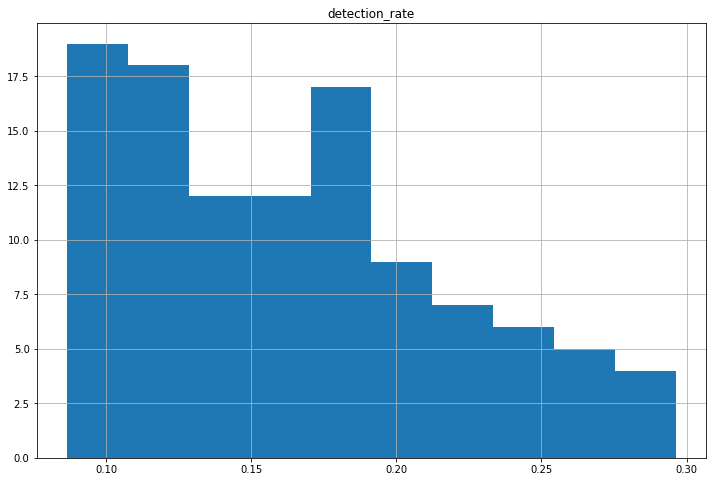

In [3]:
df = df[15:-1]
df['detection_rate'] = df['total_cases'] / df['total_infections']
df.hist(column='detection_rate', bins=10, figsize = (12,8))

To determine the average detection rate in LA county, the number of reported cases is divided by its estimated counterpart for each date. This histogram represents the distribution of each day's calculated detection rate. As displayed in the plot, LA appears to detect approximately 10-20% of all COVID 19 cases. 

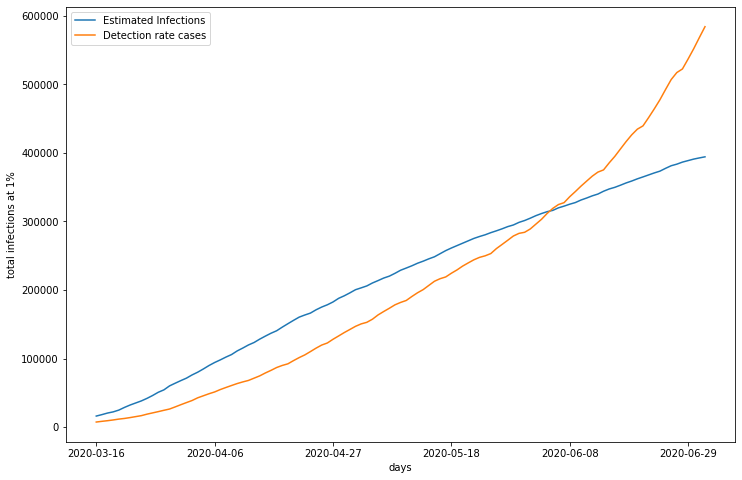

In [4]:
df['detection_cases'] = df['total_cases'] / 0.2

plt.figure(figsize=(12,8))
plt.plot(df['date_use'], df['total_infections'], label='Estimated Infections' )
plt.plot(df['date_use'], df['detection_cases'], label='Detection rate cases')
plt.xticks(np.arange(0, 110, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

LA’s detection rate ranges from approximately 10-20%. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating infection estimates based on death rates with those based on detection rates, the validity of both estimation methods can be evaluated. In this graph I created the additional estimate of infections with a conservative 20% detection rate. To cross validate for accuracy, these estimates are compared to the original infection estimation based on a 1% death rate and reported deaths. As you can see, the estimates follow two different trajectories, with death rate calculated infections reporting higher infections until approximately June 2nd, where they cross over. One possible explanation for this is poor testing practices, especially in the early stages of COVID 19. It makes sense that a shortage of testing kits contributed to underreporting of COVID 19 cases. As tests become more available and accessible, more people are able to get tested, regardless of symptoms present.